In [1]:
from neural_nets import PolicyNetwork
import pickle
from evaluator import test_random_trajectories, test_single_trajectory
from systems import InvertedPendulum, CartPole

### Training network

Epoch  10 | Train Loss: 0.000204 | Val Loss: 0.000380
Epoch  20 | Train Loss: 0.000062 | Val Loss: 0.000057
Epoch  30 | Train Loss: 0.000038 | Val Loss: 0.000024
Epoch  40 | Train Loss: 0.000025 | Val Loss: 0.000074
Epoch  50 | Train Loss: 0.000022 | Val Loss: 0.000010
Epoch  60 | Train Loss: 0.000032 | Val Loss: 0.000011
Epoch  70 | Train Loss: 0.000015 | Val Loss: 0.000005
Epoch  80 | Train Loss: 0.000023 | Val Loss: 0.000005
Epoch  90 | Train Loss: 0.000011 | Val Loss: 0.000015
Epoch 100 | Train Loss: 0.000016 | Val Loss: 0.000005


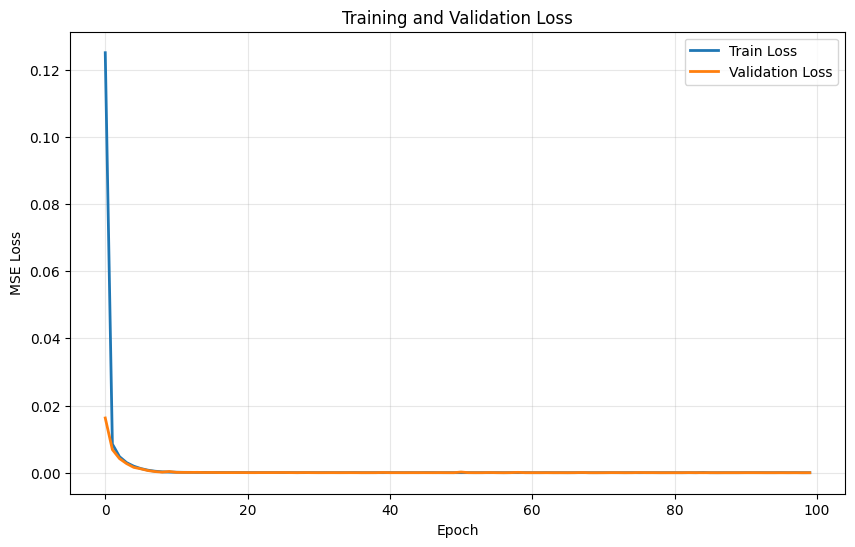

Model saved to ./nnets/cartpole/cart_base_tanh.pth


In [8]:
act = "tanh"
sys = "cart"
data_path = "./data/lqr_cart_data.pkl"
network_path = f"./nnets/cartpole/{sys}_base_{act}.pth"
safe_region_limit = 0.3
# system = InvertedPendulum(dt=0.02)
system = CartPole(dt=0.02)
network = PolicyNetwork(system, device='cuda', activation=act)

try:
    network.load_model(network_path)
except:
    with open(data_path, 'rb') as f:
        data = pickle.load(f)
    states = data['states']
    actions = data['actions']
    network.prepare_data(states, actions)
    network.train()
    network.plot_losses()
    network.save_model(network_path)

In [9]:
success_rate = test_random_trajectories(network, system, n_trials=100, n_steps=200, verbose=True, safe_region_limit=safe_region_limit)

  Trials: 100
  Successes: 89/100 (89.0%)
  Failures: 11/100


### Magnitude pruning

In [10]:
sparsities = [0.1, 0.3, 0.5, 0.7]

with open(data_path, 'rb') as f:
    data = pickle.load(f)
states = data['states']
actions = data['actions']

for s in sparsities:
    print(f"\n\nSparsity = {s}")
    
    network = PolicyNetwork(system, device='cuda', activation=act)
    network.load_model(network_path)
    train_loader, val_loader = network.prepare_data(states, actions)

    baseline_success = test_random_trajectories(network, system, n_trials=100, n_steps=200, verbose=False, safe_region_limit=safe_region_limit)
    print(f"Baseline success rate: {baseline_success}")

    print(f"Initial sparsity: {network.get_sparsity()*100:.1f}%")
    network.magnitude_pruning(sparsity=s, verbose=True)
    network.train(train_loader, val_loader)

    pruning_success = test_random_trajectories(network, system, n_trials=100, n_steps=200, verbose=True, safe_region_limit=safe_region_limit)
    print(f"Success after pruning: {pruning_success}")

    print(f"Final sparsity: {network.get_sparsity()*100:.1f}%")
    network.save_model(f"./nnets/cartpole/{sys}_{act}_mag_prun_{s}.pth")



Sparsity = 0.1
Model loaded from ./nnets/cartpole/cart_base_tanh.pth
Baseline success rate: 93.0
Initial sparsity: 0.0%
MAGNITUDE PRUNING RESULTS
0
  Pruned: 7/64 (10.9%)
2
  Pruned: 13/128 (10.2%)
4
  Pruned: 1/8 (12.5%)

Total pruned: 21/200 (10.5%)
Epoch  10 | Train Loss: 0.000017 | Val Loss: 0.000009
Epoch  20 | Train Loss: 0.000014 | Val Loss: 0.000024
Epoch  30 | Train Loss: 0.000010 | Val Loss: 0.000004
Epoch  40 | Train Loss: 0.000012 | Val Loss: 0.000004
Epoch  50 | Train Loss: 0.000012 | Val Loss: 0.000017
Epoch  60 | Train Loss: 0.000013 | Val Loss: 0.000011

Early stopping at epoch 60
  Trials: 100
  Successes: 93/100 (93.0%)
  Failures: 7/100
Success after pruning: 93.0
Final sparsity: 0.0%
Model saved to ./nnets/cartpole/cart_tanh_mag_prun_0.1.pth


Sparsity = 0.3
Model loaded from ./nnets/cartpole/cart_base_tanh.pth
Baseline success rate: 86.0
Initial sparsity: 0.0%
MAGNITUDE PRUNING RESULTS
0
  Pruned: 19/64 (29.7%)
2
  Pruned: 39/128 (30.5%)
4
  Pruned: 3/8 (37.5%)



In [11]:
sparsities = [0.1, 0.3, 0.5, 0.7]

with open(data_path, 'rb') as f:
    data = pickle.load(f)
states = data['states']
actions = data['actions']

for s in sparsities:
    print(f"\n\nSparsity = {s}")
    
    network = PolicyNetwork(system, device='cuda', activation=act)
    network.load_model(network_path)
    train_loader, val_loader = network.prepare_data(states, actions)

    baseline_success = test_random_trajectories(network, system, n_trials=100, n_steps=200, verbose=False, safe_region_limit=safe_region_limit)
    print(f"Baseline success rate: {baseline_success}")

    print(f"Initial sparsity: {network.get_sparsity()*100:.1f}%")
    network.activation_pruning(train_loader, sparsity=s, verbose=True)
    network.train(train_loader, val_loader)

    pruning_success = test_random_trajectories(network, system, n_trials=100, n_steps=200, verbose=True, safe_region_limit=safe_region_limit)
    print(f"Success after pruning: {pruning_success}")

    print(f"Final sparsity: {network.get_sparsity()*100:.1f}%")
    network.save_model(f"./nnets/cartpole/{sys}_{act}_act_prun_{s}.pth")



Sparsity = 0.1
Model loaded from ./nnets/cartpole/cart_base_tanh.pth
Baseline success rate: 93.0
Initial sparsity: 0.0%
ACTIVATION PRUNING RESULTS
Epoch  10 | Train Loss: 0.000012 | Val Loss: 0.000003
Epoch  20 | Train Loss: 0.000026 | Val Loss: 0.000020
Epoch  30 | Train Loss: 0.000013 | Val Loss: 0.000028

Early stopping at epoch 30
  Trials: 100
  Successes: 88/100 (88.0%)
  Failures: 12/100
Success after pruning: 88.0
Final sparsity: 0.0%
Model saved to ./nnets/cartpole/cart_tanh_act_prun_0.1.pth


Sparsity = 0.3
Model loaded from ./nnets/cartpole/cart_base_tanh.pth
Baseline success rate: 93.0
Initial sparsity: 0.0%
ACTIVATION PRUNING RESULTS
Epoch  10 | Train Loss: 0.000021 | Val Loss: 0.000005
Epoch  20 | Train Loss: 0.000009 | Val Loss: 0.000045
Epoch  30 | Train Loss: 0.000010 | Val Loss: 0.000005

Early stopping at epoch 32
  Trials: 100
  Successes: 91/100 (91.0%)
  Failures: 9/100
Success after pruning: 91.0
Final sparsity: 0.0%
Model saved to ./nnets/cartpole/cart_tanh_ac